**5. Apply logical regression Model techniques to predict the data on any dataset.**

**Roll no.: 265**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User_Data.csv')

In [ ]:
#input
x = dataset.iloc[:,[2,3]].values

#output
y = dataset.iloc[:,4].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
#Splitting the dataset to train and test. 75% of data is used for traning the model
#25% of it is used to test the performance of our model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

print(x_train[0:10,:])
#age and Estimated salary features values are scaled and now there is -1 to 1
#Henece, each fearture will contribute equally  to decision making
#i.e. finalizing the hypothesis

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
#traning Logistic Regression model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#After training the model, it is time to use it do predictions on testing data
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.89


<ipython-input-12-cae5bdb3dad3>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


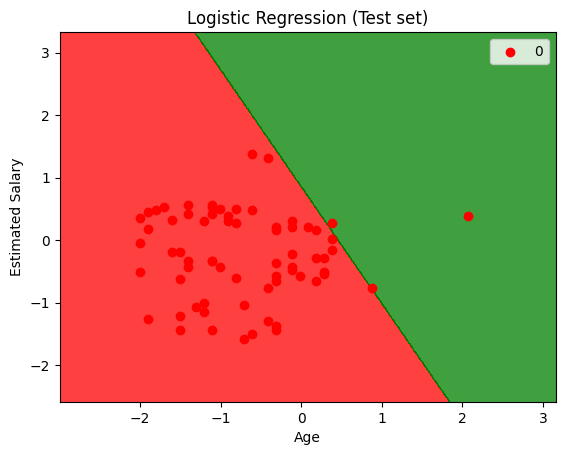

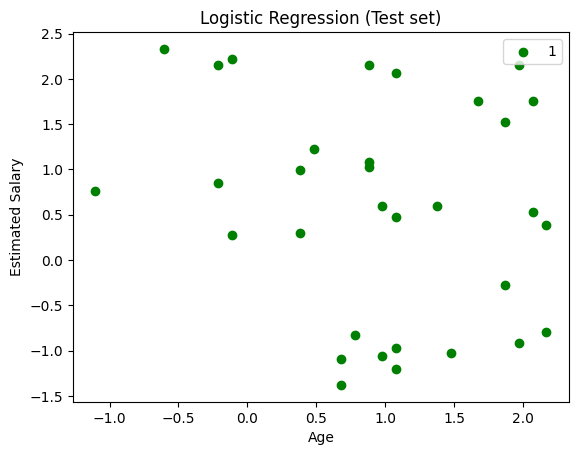

In [ ]:

from re import X
from matplotlib.colors import ListedColormap

X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)

  plt.title('Logistic Regression (Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()